In [211]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import missingno as msno
import random
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

In [212]:
# Load dataset
df1 = pd.read_csv('RSU50-20249401-DataSet.csv')

# Display the first few rows of the dataset
df1.head()

,POLICYNO,PRODUCT_TYPE,POLICYTERM_YEARS,COMMENCEDATE,COMMENCED_YEAR,PAYMENT_FREQUENCY,ANNUAL_PREMIUM,PAYMENT_METHOD,LASTPAYMENTDATE,NEXTPAYMENTDATE,...,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,AGE,GENDER,MARITAL_STATUS,NO_OF_SETTLED_CLAIMS,PAIDCLAIM_AMOUNT,LAST_CLAIM_PROCESSTIME_DAYS,PROVINCECODE,POLICY_STATUS
0,NJEV2017-1435,ENDOW,49,5/23/2017,2017,M,24732,CASH,5/23/2017,6/23/2017 0:00,...,0,0,32,M,M,0,0,0,NRWTN,LAPSE
1,NJEV2017-1511,ENDOW,49,5/25/2017,2017,M,24732,CASH,5/25/2017,6/25/2017 0:00,...,0,0,32,M,M,0,0,0,NRWTN,LAPSE
2,NJEV2017-2402,ENDOW,49,9/18/2017,2017,M,24732,CASH,9/18/2017,10/18/2017 0:00,...,0,0,32,M,M,0,0,0,NRWTN,LAPSE
3,NJEV2017-133,ENDOW,49,1/23/2017,2017,M,24732,CASH,1/23/2017,2/23/2017 0:00,...,0,0,32,F,M,0,0,0,NRWTN,LAPSE
4,NJEV2017-2747,ENDOW,49,10/25/2017,2017,M,24732,CASH,10/25/2017,11/25/2017 0:00,...,0,0,32,M,M,0,0,0,ESTRN,LAPSE


In [213]:
print("The shape of the dataframe is: {}".format(df1.shape))

The shape of the dataframe is: (160796, 26)


In [214]:
df1.columns

Index(['POLICYNO', 'PRODUCT_TYPE', 'POLICYTERM_YEARS', 'COMMENCEDATE',
       'COMMENCED_YEAR', 'PAYMENT_FREQUENCY', 'ANNUAL_PREMIUM',
       'PAYMENT_METHOD', 'LASTPAYMENTDATE', 'NEXTPAYMENTDATE',
       'NEXTPAYMENT_YEAR', 'NO_OF_MONTHS_PAID', 'NO_OF_COVERS',
       'TOTAL_SUMINSURED', 'BASIC_SUMINSURED', 'ACCIDENT_SUMINSURED',
       'HOSPITALIZATION_SUMINSURED', 'OTHER COVERS_SUMINSURED', 'AGE',
       'GENDER', 'MARITAL_STATUS', 'NO_OF_SETTLED_CLAIMS', 'PAIDCLAIM_AMOUNT',
       'LAST_CLAIM_PROCESSTIME_DAYS', 'PROVINCECODE', 'POLICY_STATUS'],
      dtype='object')

In [215]:
# Basic dataset information

print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160796 entries, 0 to 160795
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   POLICYNO                     160796 non-null  object
 1   PRODUCT_TYPE                 160796 non-null  object
 2   POLICYTERM_YEARS             160796 non-null  int64 
 3   COMMENCEDATE                 160796 non-null  object
 4   COMMENCED_YEAR               160796 non-null  int64 
 5   PAYMENT_FREQUENCY            160796 non-null  object
 6   ANNUAL_PREMIUM               160796 non-null  int64 
 7   PAYMENT_METHOD               160796 non-null  object
 8   LASTPAYMENTDATE              160796 non-null  object
 9   NEXTPAYMENTDATE              160796 non-null  object
 10  NEXTPAYMENT_YEAR             160796 non-null  int64 
 11  NO_OF_MONTHS_PAID            160796 non-null  int64 
 12  NO_OF_COVERS                 160796 non-null  int64 
 13  TOTAL_SUMINSUR

<Axes: >

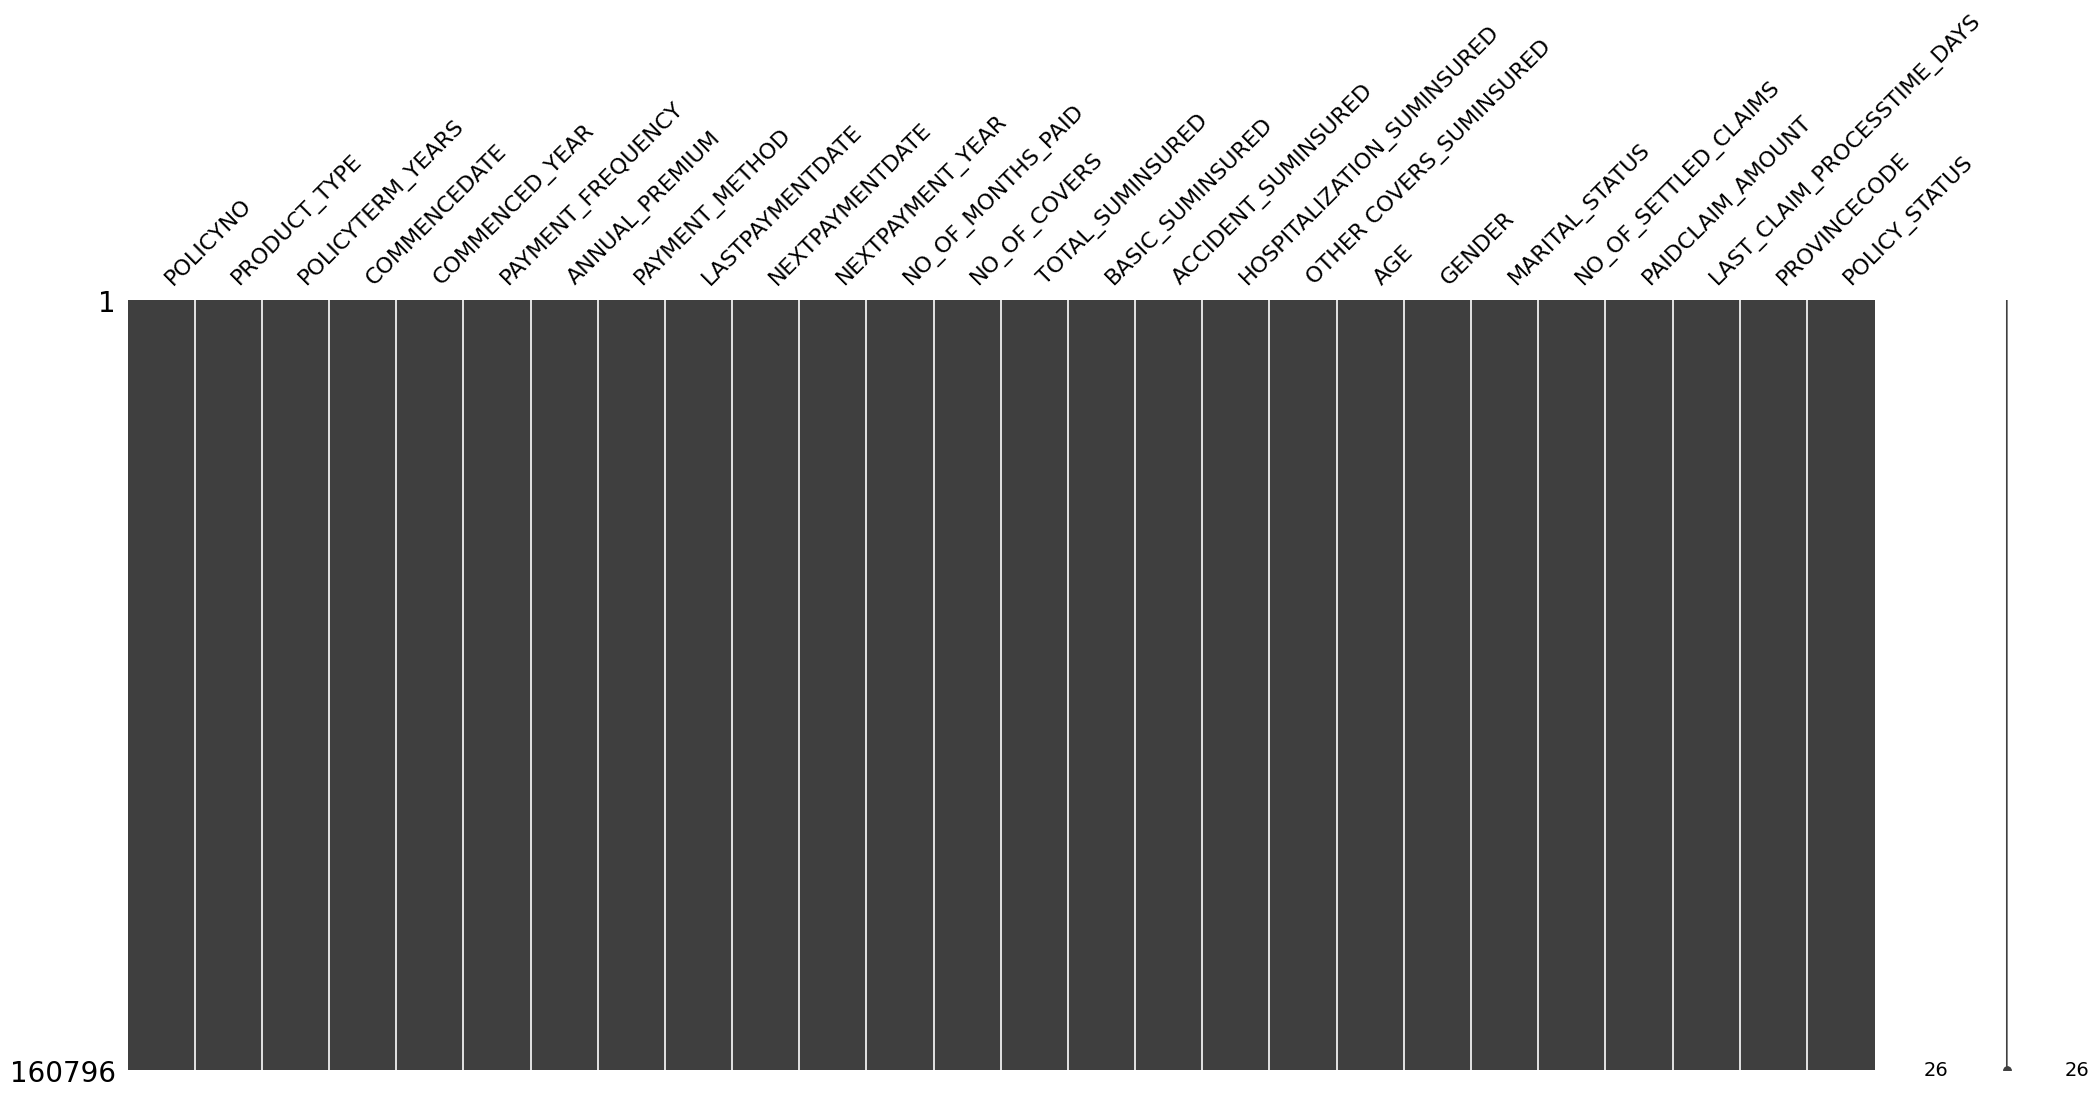

In [216]:
#Visualize Missing Values
msno.matrix(df1)


In [217]:
df1.isnull().any().any()

False

In [218]:
df1.isnull().sum()

POLICYNO                       0
PRODUCT_TYPE                   0
POLICYTERM_YEARS               0
COMMENCEDATE                   0
COMMENCED_YEAR                 0
PAYMENT_FREQUENCY              0
ANNUAL_PREMIUM                 0
PAYMENT_METHOD                 0
LASTPAYMENTDATE                0
NEXTPAYMENTDATE                0
NEXTPAYMENT_YEAR               0
NO_OF_MONTHS_PAID              0
NO_OF_COVERS                   0
TOTAL_SUMINSURED               0
BASIC_SUMINSURED               0
ACCIDENT_SUMINSURED            0
HOSPITALIZATION_SUMINSURED     0
OTHER COVERS_SUMINSURED        0
AGE                            0
GENDER                         0
MARITAL_STATUS                 0
NO_OF_SETTLED_CLAIMS           0
PAIDCLAIM_AMOUNT               0
LAST_CLAIM_PROCESSTIME_DAYS    0
PROVINCECODE                   0
POLICY_STATUS                  0
dtype: int64

In [219]:
#Checking Duplicates

print('Known observations: {}\nUnique observations: {}'.format(len(df1.index),len(df1.drop_duplicates().index)))

print("**No duplicates Found!**")

Known observations: 160796
Unique observations: 160796
**No duplicates Found!**


In [220]:
df1 = df1.drop(["COMMENCEDATE","LASTPAYMENTDATE","NEXTPAYMENTDATE","PROVINCECODE"], axis = 1)
df1.head()

,POLICYNO,PRODUCT_TYPE,POLICYTERM_YEARS,COMMENCED_YEAR,PAYMENT_FREQUENCY,ANNUAL_PREMIUM,PAYMENT_METHOD,NEXTPAYMENT_YEAR,NO_OF_MONTHS_PAID,NO_OF_COVERS,...,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,AGE,GENDER,MARITAL_STATUS,NO_OF_SETTLED_CLAIMS,PAIDCLAIM_AMOUNT,LAST_CLAIM_PROCESSTIME_DAYS,POLICY_STATUS
0,NJEV2017-1435,ENDOW,49,2017,M,24732,CASH,2017,1,1,...,0,0,0,32,M,M,0,0,0,LAPSE
1,NJEV2017-1511,ENDOW,49,2017,M,24732,CASH,2017,1,1,...,0,0,0,32,M,M,0,0,0,LAPSE
2,NJEV2017-2402,ENDOW,49,2017,M,24732,CASH,2017,1,1,...,0,0,0,32,M,M,0,0,0,LAPSE
3,NJEV2017-133,ENDOW,49,2017,M,24732,CASH,2017,1,1,...,0,0,0,32,F,M,0,0,0,LAPSE
4,NJEV2017-2747,ENDOW,49,2017,M,24732,CASH,2017,1,1,...,0,0,0,32,M,M,0,0,0,LAPSE


In [221]:
df1.describe(include=['object']).T

,count,unique,top,freq
POLICYNO,160796,160796,NJEV2017-1435,1
PRODUCT_TYPE,160796,2,ENDOW,139319
PAYMENT_FREQUENCY,160796,4,M,130234
PAYMENT_METHOD,160796,3,CASH,146088
GENDER,160796,2,M,104366
MARITAL_STATUS,160796,2,M,129160
POLICY_STATUS,160796,2,LAPSE,144148


In [222]:
# Shows statistical summaries for all numeric columns
df1.describe()

,POLICYTERM_YEARS,COMMENCED_YEAR,ANNUAL_PREMIUM,NEXTPAYMENT_YEAR,NO_OF_MONTHS_PAID,NO_OF_COVERS,TOTAL_SUMINSURED,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,AGE,NO_OF_SETTLED_CLAIMS,PAIDCLAIM_AMOUNT,LAST_CLAIM_PROCESSTIME_DAYS
count,160796.000000,160796.000000,160796.000000,160796.000000,160796.00000,160796.000000,1.607960e+05,1.607960e+05,1.607960e+05,1.607960e+05,1.607960e+05,160796.000000,160796.000000,1.607960e+05,160796.000000
mean,23.475478,2015.911758,41258.844070,2017.042346,13.89996,3.180135,2.126878e+06,6.993777e+05,7.877665e+05,3.319265e+05,3.078073e+05,35.013153,0.101184,2.115154e+03,3.580779
std,11.494318,3.964985,27919.527867,4.331993,27.32298,1.223147,1.780258e+06,5.280739e+05,9.118346e+05,3.665737e+05,4.446198e+05,9.652828,0.679076,2.146051e+04,55.526101
min,5.000000,2010.000000,12000.000000,2010.000000,1.00000,1.000000,2.000000e+05,4.068000e+03,0.000000e+00,0.000000e+00,0.000000e+00,18.000000,0.000000,0.000000e+00,0.000000
25%,16.000000,2012.000000,21676.000000,2013.000000,1.00000,3.000000,7.600000e+05,3.100000e+05,1.200000e+05,4.000000e+04,0.000000e+00,28.000000,0.000000,0.000000e+00,0.000000
50%,20.000000,2016.000000,30900.000000,2017.000000,4.00000,4.000000,1.680000e+06,5.363720e+05,6.000000e+05,2.520000e+05,2.000000e+05,33.000000,0.000000,0.000000e+00,0.000000
75%,23.000000,2020.000000,53640.000000,2021.000000,12.00000,4.000000,2.925000e+06,9.543760e+05,1.000000e+06,5.000000e+05,4.500000e+05,42.000000,0.000000,0.000000e+00,0.000000
max,49.000000,2022.000000,150000.000000,2033.000000,240.00000,6.000000,1.000000e+07,6.500000e+06,7.200000e+06,5.400000e+06,7.100000e+06,87.000000,20.000000,1.954132e+06,2816.000000


In [223]:

type_ = ["LAPSE", "ACTIVE"]
fig = make_subplots(rows=1, cols=1)

# Define custom colors
custom_colors = ['#EF553B', '#636EFA']  # You can change these colors as needed

# Create the figure and pie chart
fig = go.Figure()

# Add a Pie trace with data labels and custom colors
fig.add_trace(go.Pie(
    labels=type_,
    values=df1['POLICY_STATUS'].value_counts(),
    name="POLICY_STATUS",
    textinfo='label+percent',
    marker=dict(colors=custom_colors),
))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=0.4, textfont_size=12)

fig.update_layout(
    title_text="Active vs Lapse Policy Distribution",
    title_x=0.55,
    title_y=0.90,
    annotations=[dict(text='POLICY STATUS', x=0.5, y=-0.1, font_size=12, showarrow=False)],
    
    # Move the legend to the bottom
    legend=dict(x=0.4, y=-0.3),

    # Reduce chart size by setting height and width
    height=400,
    width=550,
)

fig.show()

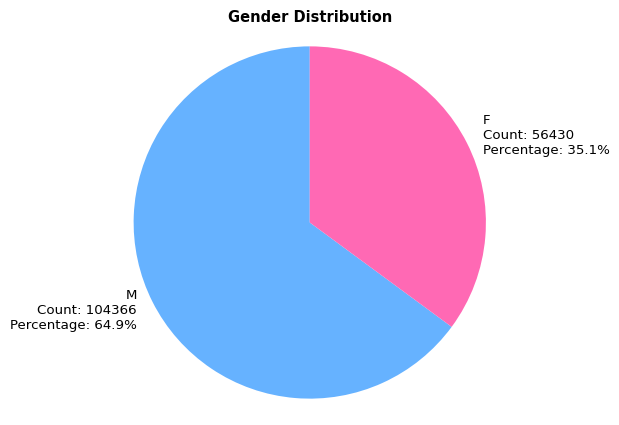

In [224]:
# Calculate gender counts
gender_counts = df1['GENDER'].value_counts()

# Calculate percentages
total_count = len(df1)
gender_percentages = (gender_counts / total_count) * 100

# Define custom colors
custom_colors = ['#66B2FF', 'hotpink']  # Custom colors for Male and Female

# Create pie chart labels with gender, count, and percentage
labels = gender_counts.index
labels_with_info = [f"{gender}\nCount: {count}\nPercentage: {percentage:.1f}%" for gender, count, percentage in zip(labels, gender_counts, gender_percentages)]

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=labels_with_info, autopct='', colors=custom_colors, startangle=90)
plt.title("Gender Distribution",fontweight='bold')

# Display the chart
plt.axis('equal')
plt.show()

In [225]:
df1.POLICY_STATUS.groupby(by = df1.GENDER).count()

GENDER
F     56430
M    104366
Name: POLICY_STATUS, dtype: int64

In [226]:
df1.GENDER[df1.GENDER == "M"].groupby(by = df1.POLICY_STATUS).count()

POLICY_STATUS
ACTIVE    10243
LAPSE     94123
Name: GENDER, dtype: int64

In [227]:
df1.GENDER[df1.GENDER == "F"].groupby(by = df1.POLICY_STATUS).count()

POLICY_STATUS
ACTIVE     6405
LAPSE     50025
Name: GENDER, dtype: int64

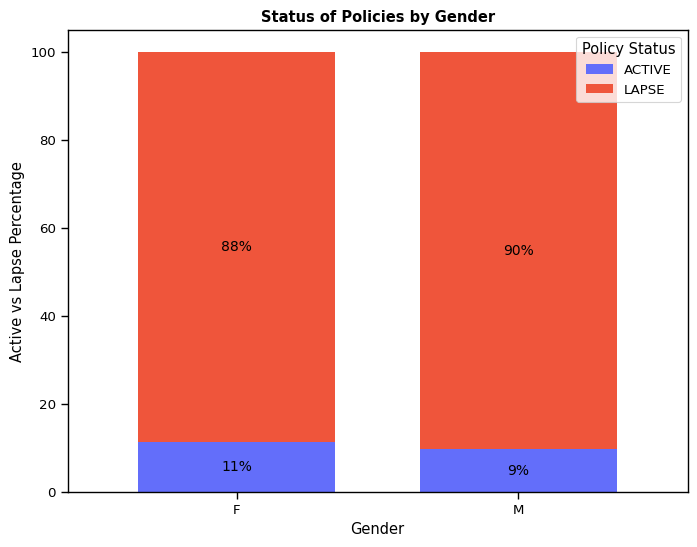

In [228]:
# Group the data by 'GENDER' and 'POLICY_STATUS' and count the number of policies in each group
grouped = df1.groupby(['GENDER', 'POLICY_STATUS']).size().unstack(fill_value=0)

# Calculate the total count of policies for each gender
total_counts = grouped.sum(axis=1)

# Calculate the percentages
percentage_grouped = grouped.div(total_counts, axis=0) * 100

# Define custom colors for each policy status
custom_colors = {
    'ACTIVE': '#636EFA',
    'LAPSE': '#EF553B'
}

# Create the stacked bar chart with custom colors
ax = percentage_grouped.plot(kind='bar', stacked=True, figsize=(8, 6), color=[custom_colors.get(col, '#A9A9A9') for col in percentage_grouped.columns], width=0.7)

# Add data labels and percentages to each segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)

plt.title('Status of Policies by Gender',fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Active vs Lapse Percentage')

# Move the legend to the bottom
plt.legend(title='Policy Status', loc='upper right')

plt.xticks(rotation=0)

plt.show()

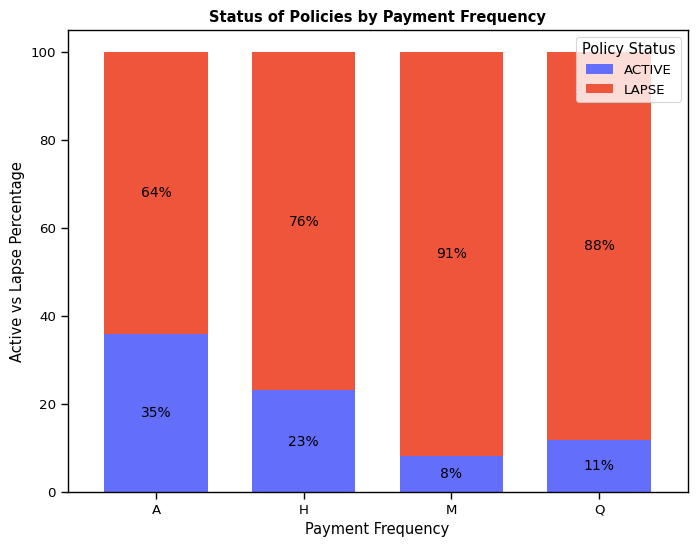

In [229]:

# Group the data by 'PAYMENT_FREQUENCY' and 'POLICY_STATUS' and count the number of policies in each group
grouped = df1.groupby(['PAYMENT_FREQUENCY', 'POLICY_STATUS']).size().unstack(fill_value=0)

# Calculate the total count of policies for each payment frequency
total_counts = grouped.sum(axis=1)

# Calculate the percentages
percentage_grouped = grouped.div(total_counts, axis=0) * 100

# Define custom colors for each policy status
custom_colors = {
    'ACTIVE': '#636EFA',
    'LAPSE': '#EF553B'
}

# Create the stacked bar chart with custom colors
ax = percentage_grouped.plot(kind='bar', stacked=True, figsize=(8, 6), color=[custom_colors.get(col, '#A9A9A9') for col in percentage_grouped.columns], width=0.7)

# Add data labels and percentages to each segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)

plt.title('Status of Policies by Payment Frequency',fontweight='bold')
plt.xlabel('Payment Frequency')
plt.ylabel('Active vs Lapse Percentage')

# Move the legend to the bottom
plt.legend(title='Policy Status', loc='upper right')

plt.xticks(rotation=0)

plt.show()

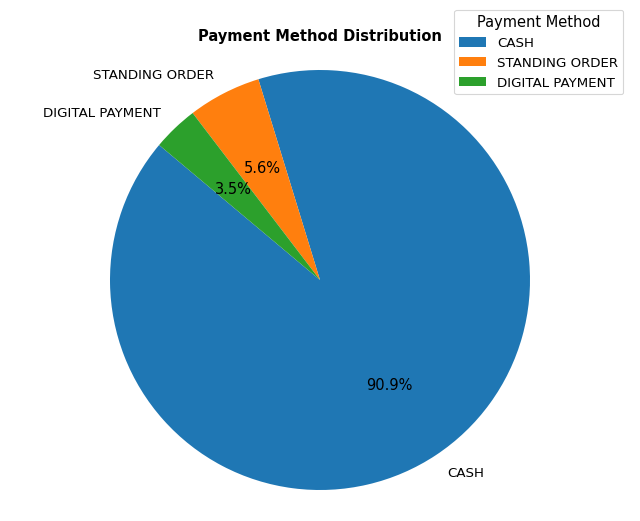

In [230]:
# Group the data by 'PAYMENT_METHOD' and count the number of occurrences for each method
payment_method_counts = df1['PAYMENT_METHOD'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Payment Method Distribution',fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(payment_method_counts.index, title='Payment Method', loc='upper right',bbox_to_anchor=(1, 1.1))

plt.show()

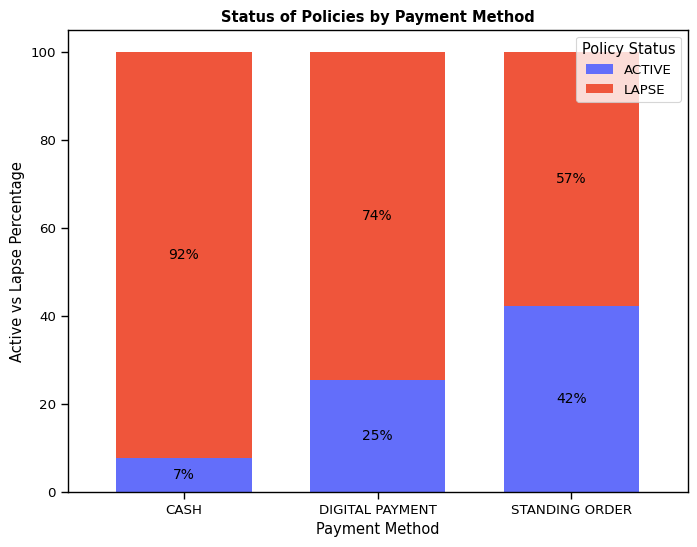

In [231]:
# Group the data by 'PAYMENT_METHOD' and 'POLICY_STATUS' and count the number of policies in each group
grouped = df1.groupby(['PAYMENT_METHOD', 'POLICY_STATUS']).size().unstack(fill_value=0)

# Calculate the total count of policies for each payment method
total_counts = grouped.sum(axis=1)

# Calculate the percentages
percentage_grouped = grouped.div(total_counts, axis=0) * 100

# Define custom colors for each policy status
custom_colors = {
    'ACTIVE': '#636EFA',
    'LAPSE': '#EF553B'
}

# Create the stacked bar chart with percentages
ax = percentage_grouped.plot(kind='bar', stacked=True, figsize=(8, 6),width=0.7,color=[custom_colors.get(col, '#A9A9A9') for col in percentage_grouped.columns])

# Add data labels and percentages to each segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)

plt.title('Status of Policies by Payment Method',fontweight='bold')
plt.xlabel('Payment Method')
plt.ylabel('Active vs Lapse Percentage')
plt.legend(title='Policy Status', loc='upper right')
plt.xticks(rotation=0)

plt.show()

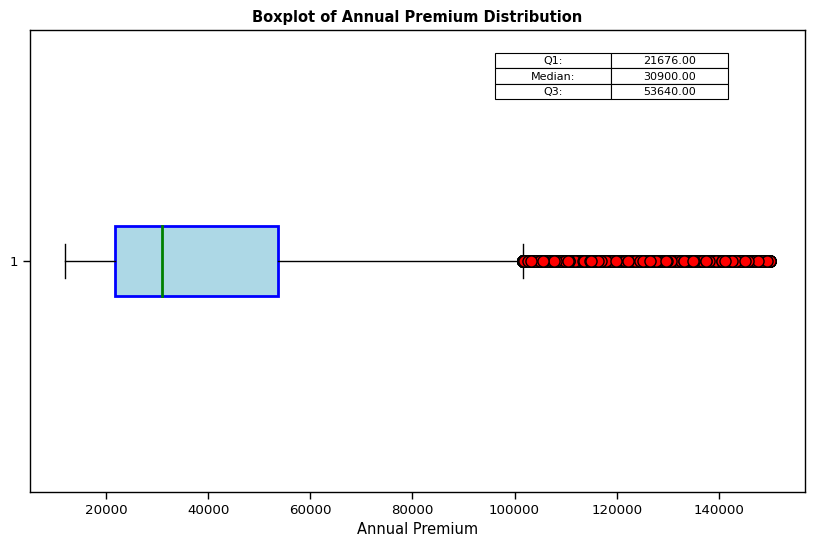

In [232]:
# Boxplot for Annual Premium Distribution of Policies

plt.figure(figsize=(10, 6))

# Create a boxplot with custom colors and labels
boxprops = dict(linestyle='-', linewidth=2, color='blue', facecolor='lightblue')  # Light blue fill color
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
medianprops = dict(linestyle='-', linewidth=2, color='green')
boxplot = plt.boxplot(df1['ANNUAL_PREMIUM'], vert=False, patch_artist=True, showfliers=True,
                      boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)

# Add axis labels
plt.title('Boxplot of Annual Premium Distribution',fontweight='bold')
plt.xlabel('Annual Premium')

# Calculate quartile values
quartiles = np.percentile(df1['ANNUAL_PREMIUM'], [25, 50, 75])
q1, median, q3 = quartiles[0], quartiles[1], quartiles[2]

# Create a table to display quartile values
table_data = [['Q1:', f'{q1:.2f}'],
              ['Median:', f'{median:.2f}'],
              ['Q3:', f'{q3:.2f}']]

# Adjust the bbox parameter to move the table to the top right corner
table = plt.table(cellText=table_data, colWidths=[0.6, 0.6], cellLoc='center', loc='upper right', bbox=[0.6, 0.85, 0.3, 0.1])
table.auto_set_font_size(False)
table.set_fontsize(8)

plt.show()

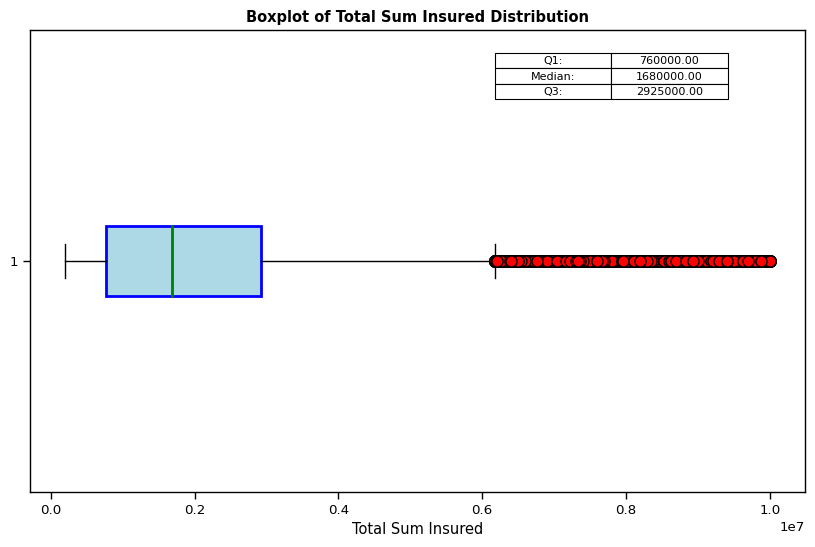

In [233]:
# Boxplot for Total Sum Insured Distribution of Policies

plt.figure(figsize=(10, 6))

# Create a boxplot with custom colors and labels
boxprops = dict(linestyle='-', linewidth=2, color='blue', facecolor='lightblue')  # Light blue fill color
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
medianprops = dict(linestyle='-', linewidth=2, color='green')
boxplot = plt.boxplot(df1['TOTAL_SUMINSURED'], vert=False, patch_artist=True, showfliers=True,
                      boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)

# Add axis labels
plt.title('Boxplot of Total Sum Insured Distribution',fontweight='bold')
plt.xlabel('Total Sum Insured')

# Calculate quartile values
quartiles = np.percentile(df1['TOTAL_SUMINSURED'], [25, 50, 75])
q1, median, q3 = quartiles[0], quartiles[1], quartiles[2]

# Create a table to display quartile values
table_data = [['Q1:', f'{q1:.2f}'],
              ['Median:', f'{median:.2f}'],
              ['Q3:', f'{q3:.2f}']]

# Adjust the bbox parameter to move the table to the top right corner
table = plt.table(cellText=table_data, colWidths=[0.6, 0.6], cellLoc='center', loc='upper right', bbox=[0.6, 0.85, 0.3, 0.1])
table.auto_set_font_size(False)
table.set_fontsize(8)

plt.show()

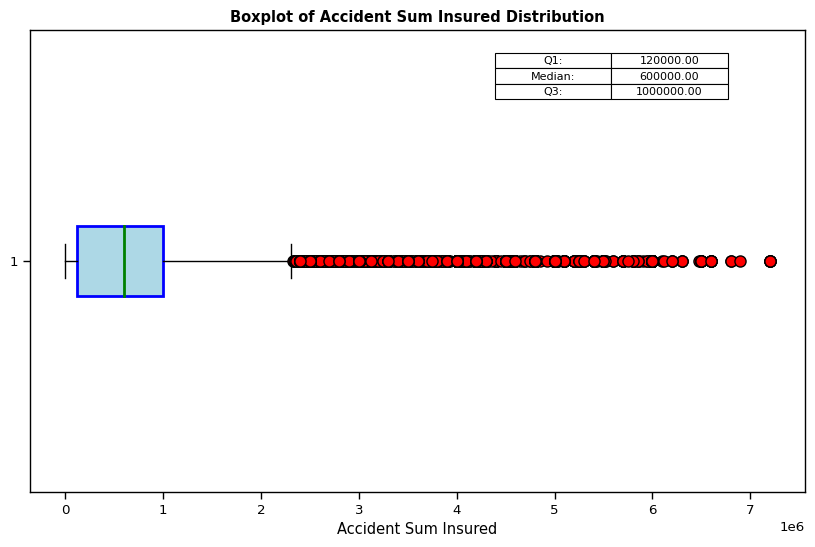

In [234]:
# Boxplot for Accident Sum Insured Distribution of Policies

plt.figure(figsize=(10, 6))

# Create a boxplot with custom colors and labels
boxprops = dict(linestyle='-', linewidth=2, color='blue', facecolor='lightblue')  # Light blue fill color
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
medianprops = dict(linestyle='-', linewidth=2, color='green')
boxplot = plt.boxplot(df1['ACCIDENT_SUMINSURED'], vert=False, patch_artist=True, showfliers=True,
                      boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)

# Add axis labels
plt.title('Boxplot of Accident Sum Insured Distribution', fontweight='bold')
plt.xlabel('Accident Sum Insured')

# Calculate quartile values
quartiles = np.percentile(df1['ACCIDENT_SUMINSURED'], [25, 50, 75])
q1, median, q3 = quartiles[0], quartiles[1], quartiles[2]

# Create a table to display quartile values
table_data = [['Q1:', f'{q1:.2f}'],
              ['Median:', f'{median:.2f}'],
              ['Q3:', f'{q3:.2f}']]

# Adjust the bbox parameter to move the table to the top right corner
table = plt.table(cellText=table_data, colWidths=[0.6, 0.6], cellLoc='center', loc='upper right', bbox=[0.6, 0.85, 0.3, 0.1])
table.auto_set_font_size(False)
table.set_fontsize(8)

plt.show()

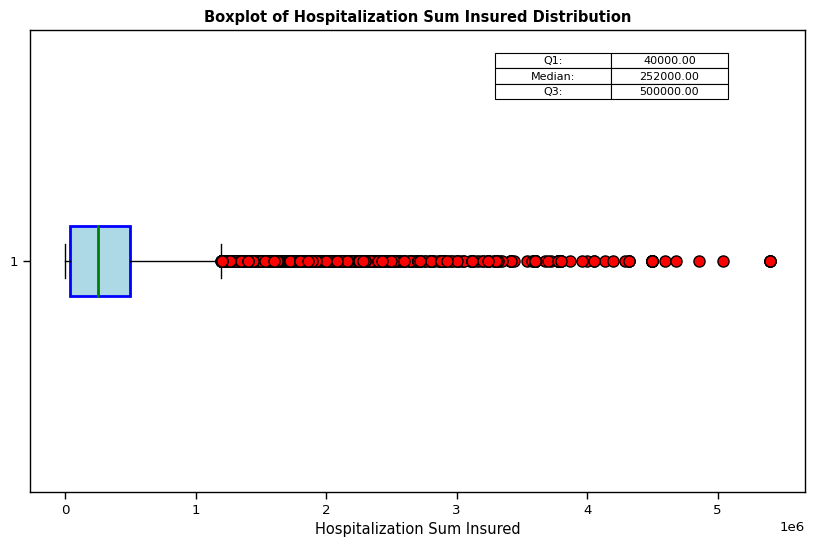

In [235]:
# Boxplot for Hospitalization Sum Insured Distribution of Policies

plt.figure(figsize=(10, 6))

# Create a boxplot with custom colors and labels
boxprops = dict(linestyle='-', linewidth=2, color='blue', facecolor='lightblue')  # Light blue fill color
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
medianprops = dict(linestyle='-', linewidth=2, color='green')
boxplot = plt.boxplot(df1['HOSPITALIZATION_SUMINSURED'], vert=False, patch_artist=True, showfliers=True,
                      boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)

# Add axis labels
plt.title('Boxplot of Hospitalization Sum Insured Distribution', fontweight='bold')
plt.xlabel('Hospitalization Sum Insured')

# Calculate quartile values
quartiles = np.percentile(df1['HOSPITALIZATION_SUMINSURED'], [25, 50, 75])
q1, median, q3 = quartiles[0], quartiles[1], quartiles[2]

# Create a table to display quartile values
table_data = [['Q1:', f'{q1:.2f}'],
              ['Median:', f'{median:.2f}'],
              ['Q3:', f'{q3:.2f}']]

# Adjust the bbox parameter to move the table to the top right corner
table = plt.table(cellText=table_data, colWidths=[0.6, 0.6], cellLoc='center', loc='upper right', bbox=[0.6, 0.85, 0.3, 0.1])
table.auto_set_font_size(False)
table.set_fontsize(8)

plt.show()

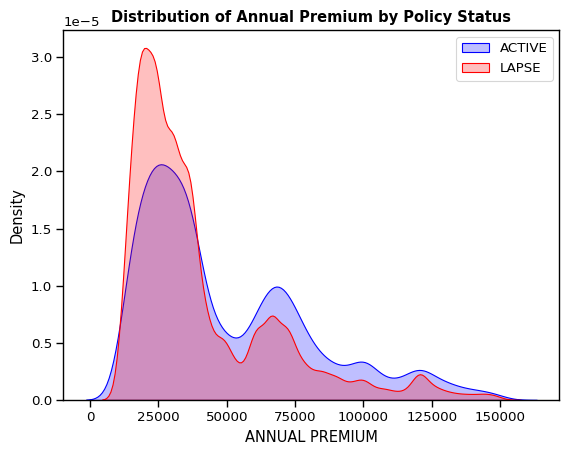

In [236]:
#Density Plot of Annual Premium

sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df1.ANNUAL_PREMIUM[(df1["POLICY_STATUS"] == 'ACTIVE') ],
                color="Blue", fill = True);
ax = sns.kdeplot(df1.ANNUAL_PREMIUM[(df1["POLICY_STATUS"] == 'LAPSE') ],
                ax =ax, color="Red", fill= True);
ax.legend(["ACTIVE","LAPSE"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('ANNUAL PREMIUM');
ax.set_title('Distribution of Annual Premium by Policy Status',fontweight='bold');

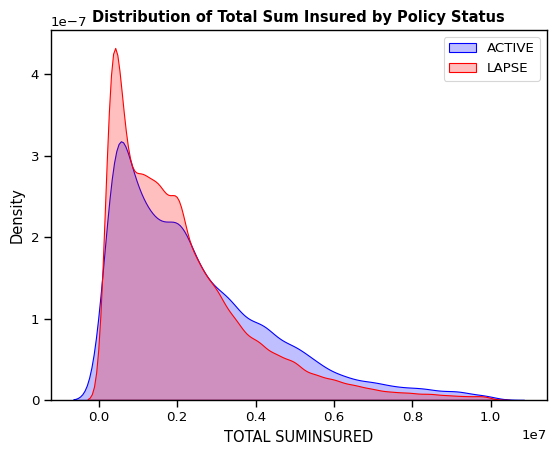

In [237]:
#Density Plot of Total Sum Insured

sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df1.TOTAL_SUMINSURED[(df1["POLICY_STATUS"] == 'ACTIVE') ],
                color="Blue", fill = True);
ax = sns.kdeplot(df1.TOTAL_SUMINSURED[(df1["POLICY_STATUS"] == 'LAPSE') ],
                ax =ax, color="Red", fill= True);
ax.legend(["ACTIVE","LAPSE"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('TOTAL SUMINSURED');
ax.set_title('Distribution of Total Sum Insured by Policy Status',fontweight='bold');

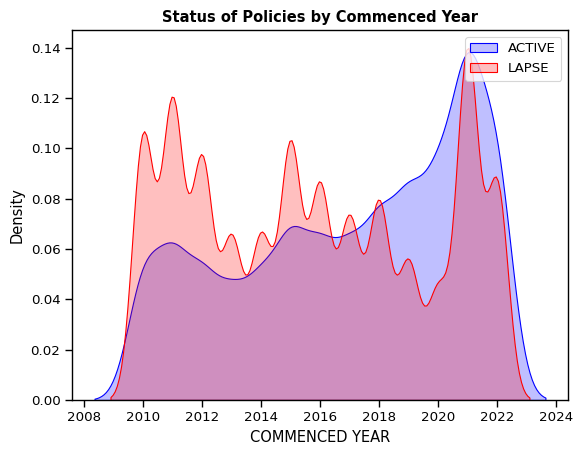

In [238]:
#Density Plot of Status of Policies by Commenced Year

sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df1.COMMENCED_YEAR[(df1["POLICY_STATUS"] == 'ACTIVE') ],
                color="Blue", fill = True);
ax = sns.kdeplot(df1.COMMENCED_YEAR[(df1["POLICY_STATUS"] == 'LAPSE') ],
                ax =ax, color="Red", fill= True);
ax.legend(["ACTIVE","LAPSE"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('COMMENCED YEAR');
ax.set_title('Status of Policies by Commenced Year',fontweight='bold');